### 1. Linear regression with 'Galton' data:

In [ ]:
#import librairies

#### 1.1. Read in data and visualize:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/data_galton.csv')

In [4]:
df.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [5]:
# There are many repeated values.
# So, we summarize as a cross table.
myTable = pd.crosstab(df.parent,df.child)
myTable

child,61.7,62.2,63.2,64.2,65.2,66.2,67.2,68.2,69.2,70.2,71.2,72.2,73.2,73.7
parent,,,,,,,,,,,,,,
64.0,1,0,2,4,1,2,2,1,1,0,0,0,0,0
64.5,1,1,4,4,1,5,5,0,2,0,0,0,0,0
65.5,1,0,9,5,7,11,11,7,7,5,2,1,0,0
66.5,0,3,3,5,2,17,17,14,13,4,0,0,0,0
67.5,0,3,5,14,15,36,38,28,38,19,11,4,0,0
68.5,1,0,7,11,16,25,31,34,48,21,18,4,3,0
69.5,0,0,1,16,4,17,27,20,33,25,20,11,4,5
70.5,1,0,1,0,1,1,3,12,18,14,7,4,3,3
71.5,0,0,0,0,1,3,4,3,5,10,4,9,2,2


In [6]:
# Transform the cross table so that it could be displyed as a Scatter plot. 
# Size of point = Frequency.
nrows = myTable.shape[0]
ncols = myTable.shape[1]
childHeights = list(myTable.columns)
parentHeights = list(myTable.index)
combo = [ (x,y,myTable.loc[x,y]) for x in parentHeights for y in childHeights]
combo = pd.DataFrame(combo, columns = ['x','y','freq'])

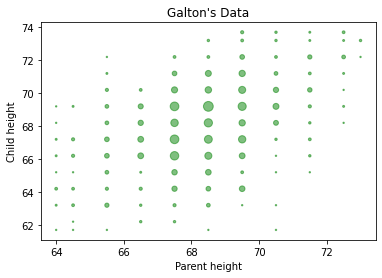

In [7]:
# Show the Scatter plot.
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='green',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Data")
plt.show()

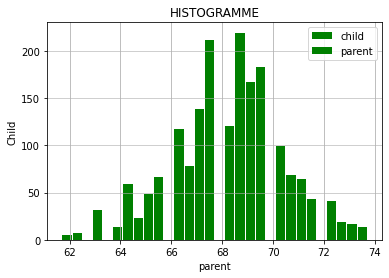

In [8]:
#Show a histogram


df.plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='green')
plt.title('HISTOGRAMME')
plt.xlabel('parent')
plt.ylabel('Child')
plt.grid(axis='y', alpha=0.75)

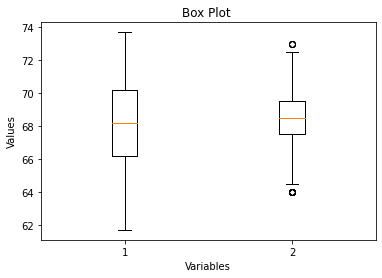

In [10]:

# create box plot
fig, ax = plt.subplots()
ax.boxplot(df)

# set axis labels and title
ax.set_xlabel('Variables')
ax.set_ylabel('Values')
ax.set_title('Box Plot ')

# show the plot
plt.show()



#### 1.2. Linear regression training:

In [11]:
# Instantiate a linear regression object.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [12]:
X=df.drop('parent',axis=1)
Y=df.drop('child',axis=1)

In [13]:
Y

,parent
0,70.5
1,68.5
2,65.5
3,64.5
4,64.0
...,...
923,69.5
924,69.5
925,69.5
926,69.5


In [65]:
X

,child
0,61.7
1,61.7
2,61.7
3,61.7
4,61.7
...,...
923,73.7
924,73.7
925,73.7
926,73.7


In [14]:

# Train.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1234)

In [15]:
X_train

,child
173,66.2
765,70.2
653,69.2
17,63.2
886,72.2
...,...
204,66.2
53,64.2
294,67.2
723,70.2


In [50]:
Y_train

173    68.5
765    67.5
653    67.5
17     68.5
886    69.5
       ... 
204    67.5
53     69.5
294    69.5
723    69.5
815    69.5
Name: parent, Length: 556, dtype: float64

In [16]:
# Show the intercept.
model = LinearRegression()
r=model.fit(X_train,Y_train)
Y_pred_test = model.predict(X_test)  
model.intercept_                          # Out-of-sample prediction. 

array([47.21137401])

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0
...,...,...
923,73.7,69.5
924,73.7,69.5
925,73.7,69.5
926,73.7,69.5


In [17]:
# Show the slope.
model.coef_

array([[0.30931323]])

#### 1.3. Visualization of the regression line:

In [18]:
# Predicted Y.
Y_pred_test

array([[68.61584929],
       [68.61584929],
       [68.92516252],
       [69.54378897],
       [67.99722284],
       [68.61584929],
       [68.61584929],
       [67.99722284],
       [68.61584929],
       [68.30653607],
       [68.30653607],
       [68.61584929],
       [67.37859639],
       [66.75996993],
       [67.06928316],
       [68.61584929],
       [67.68790961],
       [67.99722284],
       [68.30653607],
       [67.37859639],
       [69.23447575],
       [67.99722284],
       [67.06928316],
       [68.30653607],
       [68.61584929],
       [68.92516252],
       [68.30653607],
       [68.61584929],
       [68.30653607],
       [66.75996993],
       [70.00775881],
       [67.37859639],
       [67.99722284],
       [68.30653607],
       [67.06928316],
       [67.68790961],
       [68.61584929],
       [68.61584929],
       [69.54378897],
       [67.37859639],
       [69.8531022 ],
       [67.99722284],
       [68.92516252],
       [68.61584929],
       [68.92516252],
       [68

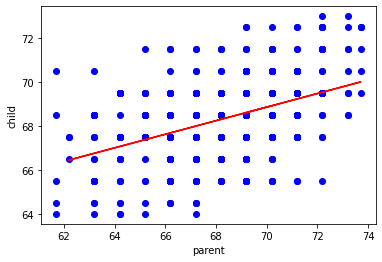

In [21]:
# Show the Scatter plot + Regression line.
plt.scatter(X_train, Y_train,color='b') 

plt.plot(X_test,Y_pred_test,color='r') 

plt.ylabel("child")
plt.xlabel("parent")

plt.show()